In [ ]:
#quantum SVM

In [4]:
import qiskit
from matplotlib import pyplot as plt
import numpy as np
from qiskit.ml.datasets import ad_hoc_data
from qiskit import BasicAer
from qiskit.aqua import QuantumInstance
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name

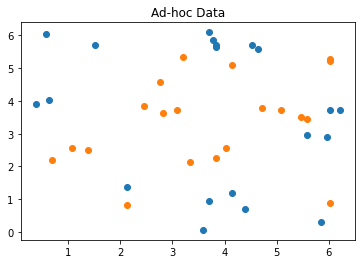

{'A': 0, 'B': 1}


In [7]:
feature_dim =2
training_dataset=20
testing_dataset_size = 10
random_seed = 10598
shots=10000

#data
sample_Total, training_input, test_input, class_labels= ad_hoc_data(training_size=training_dataset,
                                                                    test_size=testing_dataset_size,
                                                                    gap= 0.5, #gap in higher dim space,
                                                                    n=feature_dim,
                                                                    plot_data=True)
datapoints , class_to_label = split_dataset_to_data_and_labels(test_input)
print(class_to_label)

In [9]:
#run on simulator 
backend = BasicAer.get_backend('qasm_simulator')
feature_map =ZZFeatureMap(feature_dim,reps=2)
svm= QSVM(feature_map,training_input,test_input,None)
svm.random_seed = random_seed
quantim_instance = QuantumInstance(backend,shots=shots, seed_simulator=random_seed,seed_transpiler=random_seed)
result=svm.run(quantim_instance)

kernal Matrix during training:


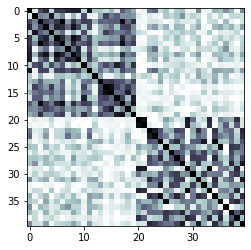

In [12]:
#distance between points in higher dimensional space

print('kernal Matrix during training:')
kernel_matrix= result['kernel_matrix_training']
img = plt.imshow(np.asmatrix(kernel_matrix),interpolation='nearest', origin='upper',cmap='bone_r')
plt.show()

In [14]:
#validating accuracy 

predicted_labels = svm.predict(datapoints[0])
predicted_classes= map_label_to_class_name(predicted_labels, svm.label_to_class)
print("ground truth: {}".format(datapoints[0]))
print("prediction :  {}".format(predicted_labels))
print("testing success ratio: ", result['testing_accuracy'])

ground truth: [[2.26194671 3.45575192]
 [0.31415927 3.89557489]
 [3.76991118 4.83805269]
 [0.56548668 3.64424748]
 [5.65486678 3.01592895]
 [5.65486678 2.82743339]
 [6.03185789 3.76991118]
 [0.87964594 4.39822972]
 [4.71238898 5.34070751]
 [1.94778745 6.03185789]
 [3.26725636 2.26194671]
 [2.07345115 1.00530965]
 [3.20442451 5.02654825]
 [4.64955713 2.136283  ]
 [0.18849556 2.19911486]
 [2.76460154 4.33539786]
 [3.76991118 2.19911486]
 [4.0212386  2.26194671]
 [6.1575216  4.1469023 ]
 [1.31946891 5.96902604]]
prediction :  [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
testing success ratio:  1.0
